In [1]:
%pip install -q numpy
%pip install -q pandas
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q js

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import piplite
#await piplite.install(['numpy'],['pandas'])
#await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
#from js import fetch
#import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(URL)
#boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(URL)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

Null Hypothesis (H₀): There is no significant difference in the median value of homes bounded by the Charles River and those that are not.
H0​: μCHAS=0 ​= μCHAS=1​

Alternative Hypothesis (H₁): There is a significant difference in the median value of homes bounded by the Charles River and those that are not.
H1: μCHAS=0 ≠ μCHAS=1H1​

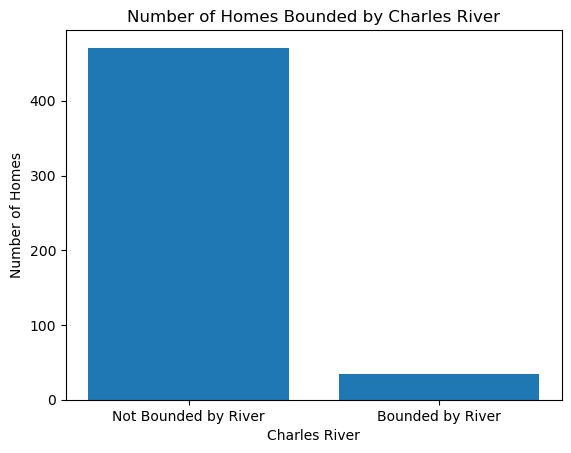

T-statistic: -3.113291312794837
P-value: 0.0035671700981375174
We reject the null hypothesis (H₀), there is a significant difference in the median value of homes bounded by the Charles River and those that are not.


In [10]:
# Bar plot for the CHAS variable (whether the home is bounded by Charles River)
chas_counts = boston_df['CHAS'].value_counts()
pyplot.bar(chas_counts.index, chas_counts.values, tick_label=['Not Bounded by River', 'Bounded by River'])
pyplot.xlabel('Charles River')
pyplot.ylabel('Number of Homes')
pyplot.title('Number of Homes Bounded by Charles River')
pyplot.show()

# T-test for independent samples: median value of homes bounded by Charles River or not
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=False)

alpha = 0.05

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < alpha:
    print("We reject the null hypothesis (H₀), there is a significant difference in the median value of homes bounded by the Charles River and those that are not.")
else:
    print("We fail to reject the null hypothesis (H₀), there is no significant difference in the median value of homes bounded by the Charles River and those that are not.")

Null Hypothesis (H₀): The mean median house values are the same across all groups based on the proportion of owner-occupied units built before 1940 (AGE).

Alternative Hypothesis (H₁): At least one group has a different mean median house value compared to the others.

<Figure size 1000x600 with 0 Axes>

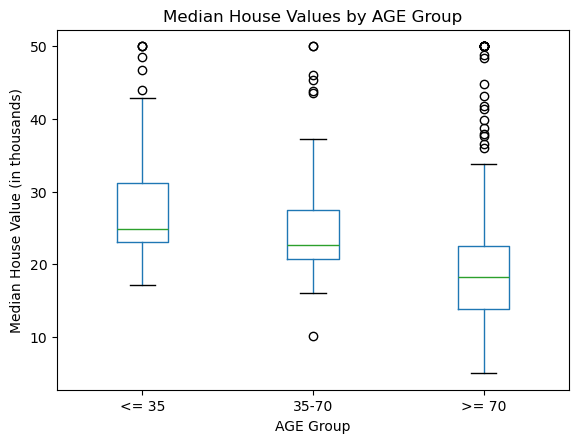

                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
P-value: 1.7105011022701282e-15
We reject the null hypothesis (H₀). There is a significant difference in the median house values across the AGE groups.


In [19]:
# Creating 3 groups based on the AGE variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<= 35', '35-70', '>= 70'])

# Boxplot for median house values across different AGE groups
pyplot.figure(figsize=(10,6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
pyplot.title('Median House Values by AGE Group')
pyplot.suptitle('')
pyplot.xlabel('AGE Group')
pyplot.ylabel('Median House Value (in thousands)')
pyplot.show()

# Performing ANOVA using statsmodels
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

# Conclusion based on p-value from ANOVA
alpha = 0.05
p_val_anova = anova_table["PR(>F)"].iloc[0]  # Fixing by using iloc to reference the first row
print("P-value:", p_val_anova)

if p_val_anova < alpha:
    print("We reject the null hypothesis (H₀). There is a significant difference in the median house values across the AGE groups.")
else:
    print("We fail to reject the null hypothesis (H₀). There is no significant difference in the median house values across the AGE groups.")


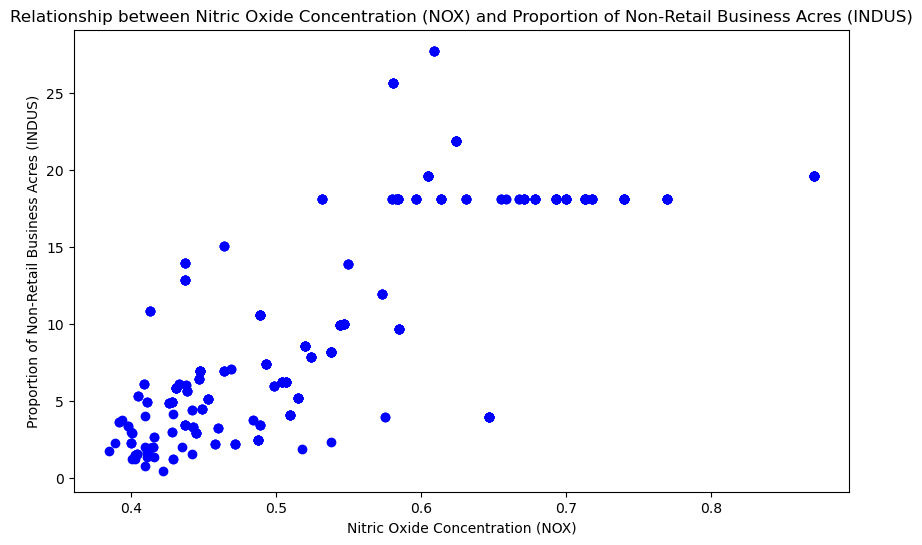

Pearson correlation coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
We reject the null hypothesis (H₀). There is a statistically significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.


In [20]:
from scipy.stats import pearsonr

# Scatter plot to show the relationship between NOX and INDUS
pyplot.figure(figsize=(10,6))
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], color='blue')
pyplot.title('Relationship between Nitric Oxide Concentration (NOX) and Proportion of Non-Retail Business Acres (INDUS)')
pyplot.xlabel('Nitric Oxide Concentration (NOX)')
pyplot.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.show()

# Performing Pearson Correlation test
corr, p_val_p = pearsonr(boston_df['NOX'], boston_df['INDUS'])

alpha = 0.05

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_val_p}")

if p_val_p < alpha:
    print("We reject the null hypothesis (H₀). There is a statistically significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.")
else:
    print("We fail to reject the null hypothesis (H₀). There is no statistically significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.")

Conclusion:
Since the p-value is less than the significance level alpha (0.05), we reject the null hypothesis. This means that there is a statistically significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.

In [23]:
# Performing linear regression using statsmodels
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

p_value_r = model.pvalues['DIS']
alpha = 0.05
print("P-value:", p_value_r)

if p_value_r < alpha:
    print("We reject the null hypothesis (H₀). The weighted distance to the Boston employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("We fail to reject the null hypothesis (H₀). The weighted distance to the Boston employment centers has no significant impact on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        12:16:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

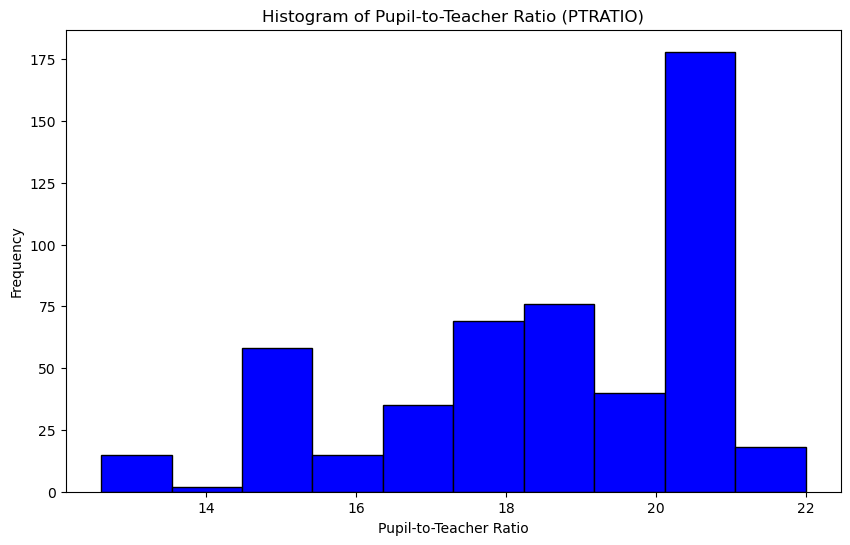

In [24]:
pyplot.figure(figsize=(10,6))
pyplot.hist(boston_df['PTRATIO'], bins=10, color='blue', edgecolor='black')
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

6. A boxplot for "Median value of owner-occupied homes".

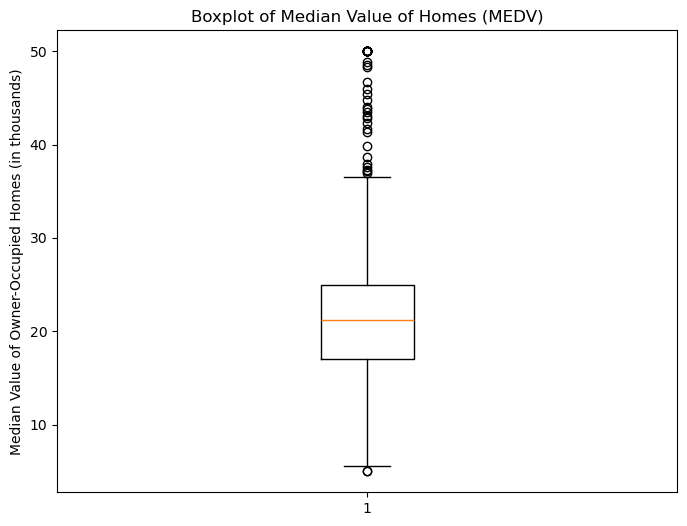

In [26]:
pyplot.figure(figsize=(8,6))
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Homes (MEDV)')
pyplot.ylabel('Median Value of Owner-Occupied Homes (in thousands)')
pyplot.show()